<font size="10">
    <div align="center">
        Técnicas y algoritmos de búsqueda
    </div>
</font>
<font size="6">
    <div align="center">
        Informe de la práctica 3
    </div>
    <br>

</font>
<font size="5">
    <div align="center">
        Gabriel Niculescu Ruso 
    </div>
    <div align="center">
        Carlos Molera Canals
    </div>
    <div align="center">
        Jose Francisco Pérez Mompeán
    </div>
</font>
<font size="5">
    <div align="right">
        29/05/2025
    </div>
</font>


<div>
    <hi><font size="6"><strong>Index</strong></font></hi>
    <ol>
        <li><font size="4">Alpha-Beta</font></li>
        <li><font size="4">Tabla de transposición</font></li>
        <li><font size="4">Función de Evaluación</font></li>
        <li><font size="4">La red</font></li>
        <li><font size="4">Testing</font></li>
    </ol>
</div>

## **FUNCIÓN DE EVALUACIÓN**

Una vez expuestas las metodologías empleadas en términos de ejercer la búsqueda, cabe señalar cuál es la función de evaluación en base a que estas últimas se nutren y apoyan. De manera concreta, a lo largo de esta sección se explorarán los siguientes apartados componentes:

<ol>
    <li>
        <strong>Introducción sobre los parámetros</strong>
    </li>
    <li>
        <strong>Explicación de las secciones</strong>
    </li>
    <li>
        <strong>Descartes y razones</strong>
    </li>


</ol>

### **1.Introducción sobre los parámetros**

Con relación a los parámetros de que nuestra función de evaluación se compone, podemos encontras los que siguen:

**1.list_of_moves** **$\rightarrow$ list[str]**

Se expone como una lista componente en los últimos cuatro movimientos que Pacman ha desarrollado y que estarán codificados en términos de cadenas de texto en representación de los puntos cardinales. Con objeto de justificar su existencia de forma escuesta, encontramos que esta remite a la necesidad de escape frente a un bucle de movimientos que de manera posterior se explicará.<br><br>


**2.ghost_heat_map** **$\rightarrow$ dict[tuple[int,...], np.ndarray]**

Es un diccionario cuyos valores serán otros diccionarios anidados en codificación de los distintos mapas y que representarán el espectro de influencia que los fantasmas pueden tener sobre las  posiciones a ocupar sobre el layout determinado por la clave interna. <br><br>

**3.current_heat_map** **$\rightarrow$ np.ndarray**

Es un array dispuesto para la evaluación de la peligrosidad estática de las celdas libres asociadas al mapa que hemos escogido en la llamada al Agente.De esta manera pues, localizamos que junto con el parámetro anterior lo que modelaremos serán una métrica dinámica en representación de la peligrosidad relativa de las distintas posiciones que el comecocos va adoptando.<br><br>


**4.original_food** **$\rightarrow$ list[int]**

Es un array en representación del número de capsulas de comida de que cada una de las particiones del mapa es componente; partición la cual se presentará más adelante. No obstante, cabe señalar que la aplicabilidad directa de este atributo ha sido derogada en base a una serie de razones que, junto con su razón de ser a priori, serán explicadas.<br><br>

**5.state** **$\rightarrow$ GameState**

Es una representación del estado actual del juego y que nos permitirá el acceso a parámetros utilitarios tales como la posición de Pacman, la de los fantasmas; e incluso valores como la puntuación y distribución de la comida  para el ply con que trabajamos.

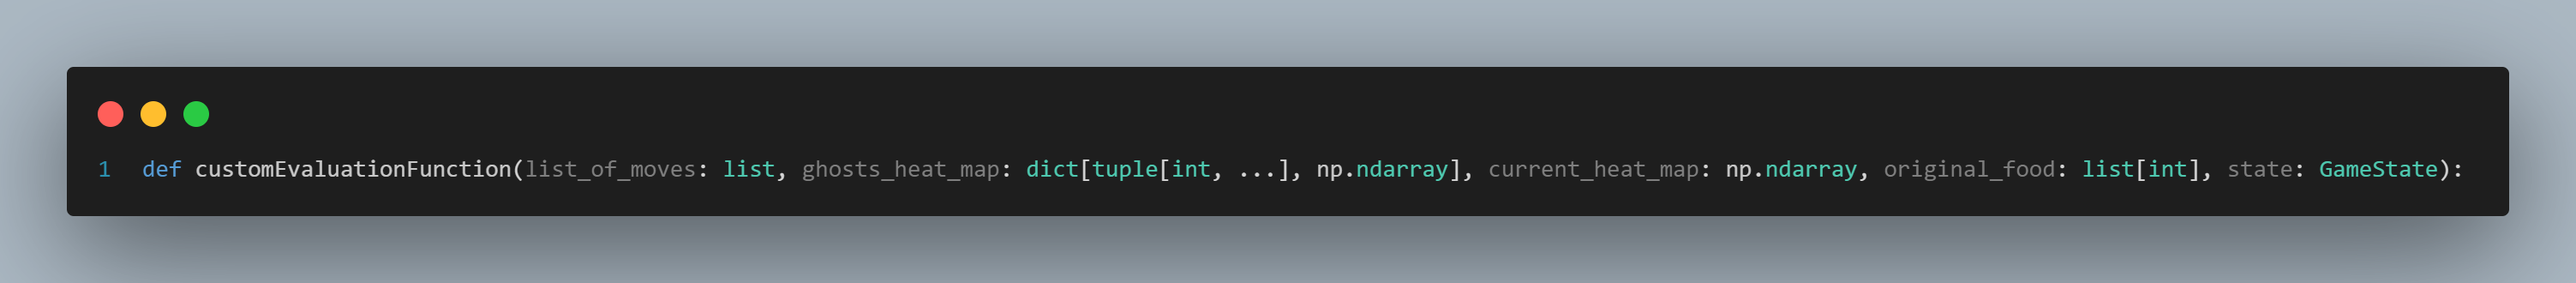

### **2.Explicación de las secciones**

Tal y como habíamos dejado entreveer anteriormente, existen una serie de secciones en base a las cuales se construirá el cálculo final de nuestra función de nuestra evaluación sobre el estado actual.

Cabe señalar no obstante que se omitirá la parte del código referente a la obtención de las posiciones de los fantasmas y de Pacman en tanto que de manera explícita ya ha sido mencionado anteriormente el que estas se extraigan vía el objeto GameState proporcionado como parámetro



### **SECURITY**

En esta sección lo que se buscará es calcular la distribución de peligrosidad en el mapa bajo el que trabajamos de tal forma que cada una de las casillas libres quede ponderada de base por un determinado factor de peligrosidad. Distinguimos dos partes claras en el proceso<BR><br>


**MAPA TOPOLÓGICO ESTÁTICO**

De cara a lograr todo esto, encontramos que en primer lugar se generó un mapa de calor en representación del riesgo estático que a cada una  de las distintas zonas del mapa se asociaba.

En lo que refiere a la construcción de dicha estructura, de manera particular se atribuyó un valor de peligrosidad $k \in \left\{0,5\right\}$ a cada una de las celdas y que vino dado en base a un criterio que inequívocamente se había de apoyar sobre la información topológica. 

Con objeto de explicar cuál ha sido este criterio topológico, localizamos que ha tenido su fundamentación en el número de opciones posibles de movimiento con que Pacman contaba en cada momento. Consecuentemente, encontramos que las intersecciones entre caminos se presentarán como las zonas más seguras topológicamente, mientras que a medida que nos vamos acercando a las esquinas dicho valor de seguridad va decrementado hasta que estas últimas son alcanzadas.

No obstante, también cabe señalar cuál es el modelo de evolución de la puntuación. En primer lugar, encontramos que, tal y como hemos mencionado, a las intersecciones se les atribuirá una puntuación de peligrosidad 0 que irá incrementando a medida que nos acerquemos a los extremos del mapa hasta un valor que vendrá condicionado por la longitud de dicho recorrido y que habrá de estar en concordancia con el flujo de puntuación que llega por parte de la otra vía de  comunicación. 

Si bien puede resultar confuso, veamos el siguiente ejemplo:



<div align = center>
    <img src = '../fotos/foto_mapa_calor.png'>
</div>

Como podemos observar, el valor mínimo irá progresando e incrementando hasta que se acerque a las esquinas. No obstante, y entendiendo el mapa como un sistema recorrido por un fluido, si tenemos dos fuentes generadoras del mismo llegará un punto en que ambos se encuentren y tengan que igualar fuerzas. Cabe señalar a su vez que el avance por cada una de las distintas fuentes (círculos blancos) se  produce a la misma velocidad y en todas las direcciones que los movimientos legales de Pacman permitan en cada momento. 


En esencia, lo que se pretendía recalcar con esta aclaración es el hecho de que por cuestiones de simetría los valores mínimos de seguridad que dentro del dominio definido se encuadran no siempre van a ser alcanzables en las esquinas.


**COMPONENTE DINÁMICA** 

Expresado lo anterior, y dado que pretendíamos ejercer una evaluación global del peligro, se presentó como necesario el considerar el impacto que la presencia de los enemigos o fantasmas podrían llegar a tener sobre la metodología de puntuación que en el primer apartado se ha establecido. 

Con ello, entenderemos al tipo fantasma como un campo con algún tipo de energía dispuesta y que a  medida que se va desplazando sobre las casillas ponderadas en base a la topología va alterando su valor. Al igual que sucede en campos definidos en términos formales, el impacto o potencia del mismo irá variando a medida que nos vayamos alejando del foco emisor. Si bien campos como el eléctrico tienen un potencial que es cero en el infinito, lo que pretendíamos modelar era más el efecto de sumidero de peligrosidad más que el ceñirnos a lo que sería correcto desde un punto de vista teórico. 

Consecuentemente, encontramos que generaremos un modelado de rango de influencia limitado $r$, centrado en el fanstasma y cuyo valor variará en voluntad de adaptarse a la geometría y dimensiones de cada uno de los mapas dispuestos. Veamos pues una pareja de ejemplos de lo que el efecto de dicho fantasma supone en mapas distintos:


<strong>1.MAPA MEDIUM CLASSIC</strong>

<strong>2.MAPA TRICKY CLASSIC</strong>

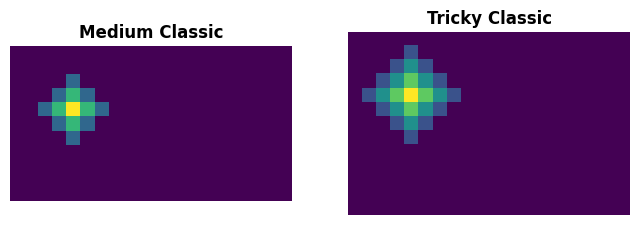

Tal y como podemos observar, el rango de influencia o de impacto entre ambos mapas se expone como distinto del mismo modo que también lo son sus dimensiones; siendo pues este más grande en el caso del mapa de tamaño más elevado 

Finalmente, y en voluntad de exponer como dicho campo actúa sobre la evaluación estática antes ejercida, entendemos que simplemente se presentará como una combinación lineal de valores, esto es, una suma de los arrays representados en ambas metodologías de ponderación.

Sea pues esta la fórmula que codifica el valor de cada una de las celdas 

$$\text{Final danger} = \text{Static Danger + Dynamic Danger}

**CÓDIGO**


Finalmente, cabe señalar que los diccionarios que codifican los mapas de calor estáticos y dinámicos estarán almacenados en un formato pickle para facilitar su carga.

Matizado esto último, veamos una imagen asociada al código que ha sido empleado para desempeñar la tarea:


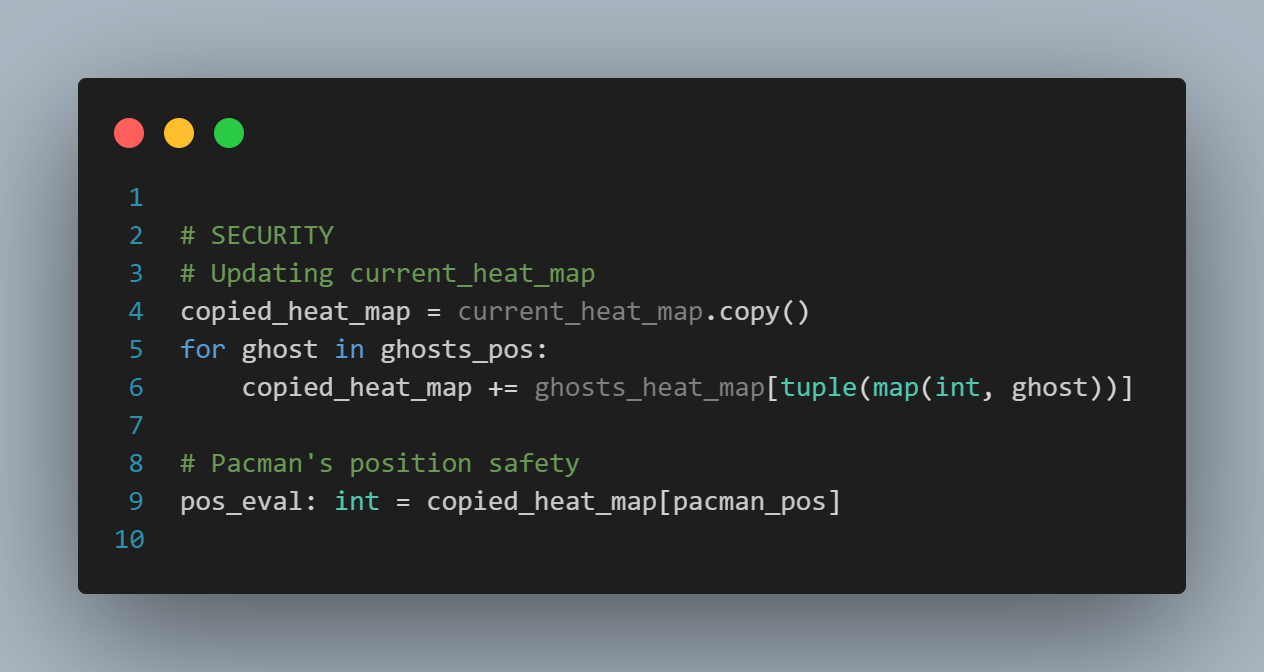